一、将原视频中的每一帧提取出来并保存为图片在transv_result文件夹中（文件夹提前建好）

In [ ]:
# 这里将视频的每一帧都提取出来了
import cv2
from tqdm import tqdm
video = cv2.VideoCapture("video.mp4")
fps = video.get(cv2.CAP_PROP_FPS)
frameCount = video.get(cv2.CAP_PROP_FRAME_COUNT)
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("总共的帧数为：",frameCount)
success, frame = video.read() 
index = 0
img_num=int(frameCount)
for i in tqdm(range(int(frameCount)),desc='处理进度'):
    if success:
        cv2.imwrite('transv_result/'+str(index)+'.jpg', frame)
    success, frame = video.read()
    index += 1

总共的帧数为： 165.0


处理进度: 100%|██████████| 165/165 [00:04<00:00, 33.37it/s]


二、显示待预测图片，检测是否第一步已成功

In [ ]:
# 待预测图片
img_name = '0.jpg'
#test_img_path = ["./"+img_name]
test_img_path = ["transv_result/0.jpg"]

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

img = mpimg.imread(test_img_path[0]) 

# 展示待预测图片
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

<Figure size 1000x1000 with 1 Axes>

三、扣出每一帧人物图像，并保存在humanseg_output的文件夹里

In [ ]:
!pip install paddlehub==1.6.0 -i https://pypi.tuna.tsinghua.edu.cn/simple
!hub install deeplabv3p_xception65_humanseg==1.0.0


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmpnvdvjrgi/deeplabv3p_xception65_humanseg
[==================================================] 100.00%


In [ ]:
#导入包
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import paddlehub as hub
#import paddle
#paddle.enable_static() ##防止报错




In [ ]:
# 抠出每一帧的人像图片，进行一个循环

for i in range(img_num):
    img_name = str(i)+'.jpg'
    test_img_path = ["transv_result/"+img_name]
#test_img_path = ["./transvideo_result/0.jpg"]
    img = mpimg.imread(test_img_path[0]) 
    module = hub.Module(name="deeplabv3p_xception65_humanseg")
    input_dict = {"image": test_img_path}

# execute predict and print the result
    results = module.segmentation(data=input_dict)


[2025-09-03 12:19:57,800] [    INFO] - Installing deeplabv3p_xception65_humanseg module
[2025-09-03 12:19:57,813] [    INFO] - Module deeplabv3p_xception65_humanseg already installed in /home/aistudio/.paddlehub/modules/deeplabv3p_xception65_humanseg
[2025-09-03 12:19:58,290] [    INFO] - 0 pretrained paramaters loaded by PaddleHub
[2025-09-03 12:19:59,942] [    INFO] - Installing deeplabv3p_xception65_humanseg module
[2025-09-03 12:19:59,955] [    INFO] - Module deeplabv3p_xception65_humanseg already installed in /home/aistudio/.paddlehub/modules/deeplabv3p_xception65_humanseg
[2025-09-03 12:20:00,381] [    INFO] - 0 pretrained paramaters loaded by PaddleHub
[2025-09-03 12:20:01,842] [    INFO] - Installing deeplabv3p_xception65_humanseg module
[2025-09-03 12:20:01,853] [    INFO] - Module deeplabv3p_xception65_humanseg already installed in /home/aistudio/.paddlehub/modules/deeplabv3p_xception65_humanseg
[2025-09-03 12:20:02,275] [    INFO] - 0 pretrained paramaters loaded by PaddleHu

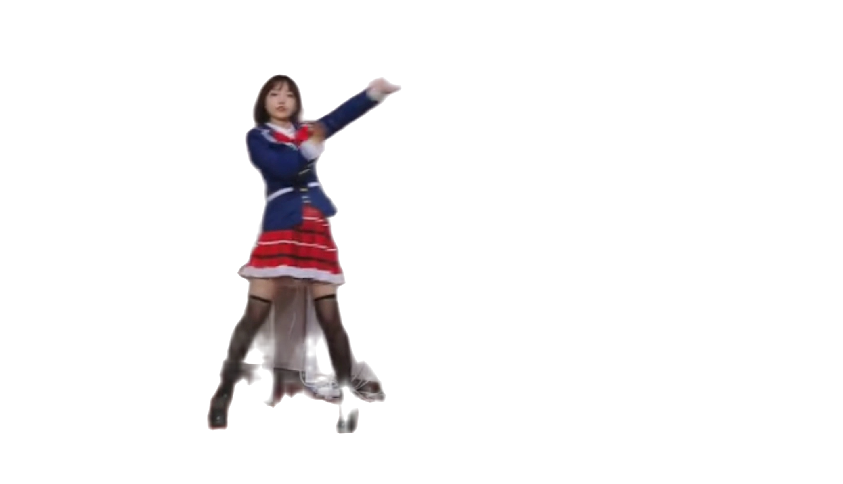

In [ ]:
# 抠图结果展示
test_img_path = "humanseg_output/"+img_name.split('.')[0]+'.png'
img = mpimg.imread(test_img_path)
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

四、视频图像提取 利用cv2库提取视频里的图像

In [ ]:
# 这里将背景的每一帧都提取出来了
import cv2
from tqdm import tqdm
video = cv2.VideoCapture("bkg.mp4")
fps = video.get(cv2.CAP_PROP_FPS)
frameCount = video.get(cv2.CAP_PROP_FRAME_COUNT)
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("总共的帧数为：",frameCount)
success, frame = video.read() 
index = 0
for i in tqdm(range(int(frameCount)),desc='处理进度'):
    if success:
        cv2.imwrite('back_video_img/'+str(index)+'.jpg', frame)
    success, frame = video.read()
    index += 1

总共的帧数为： 165.0


处理进度: 100%|██████████| 165/165 [00:04<00:00, 33.34it/s]


五、将视频的每一帧与图片进行融合，最后保存为图片

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
def blend_images(fore_image, base_image, img_num):
#def blend_images(fore_image, base_image):
    """
    将抠出的人物图像换背景
    fore_image: 前景图片，抠出的人物图片
    base_image: 背景图片
    """
    # 读入图片
    base_image = Image.open(base_image).convert('RGB')
    fore_image = Image.open(fore_image).resize(base_image.size)

    # 图片加权合成
    scope_map = np.array(fore_image)[:,:,-1] / 255
    scope_map = scope_map[:,:,np.newaxis]
    scope_map = np.repeat(scope_map, repeats=3, axis=2)
    res_image = np.multiply(scope_map, np.array(fore_image)[:,:,:3]) + np.multiply((1-scope_map), np.array(base_image))
    
    #保存图片
    res_image = Image.fromarray(np.uint8(res_image))
    res_image.save('./blend_img/'+str(img_num)+".jpg")

In [ ]:
#抠出的人物图片和背景图片进行融合，进行循环
import os
for i in range(img_num):
    blend_images('./humanseg_output/'+str(i)+'.png', './back_video_img/'+str(i)+".jpg", i)

六、将视频的每一帧与图片进行融合，最后保存为图片

In [35]:
# 合成视频
import cv2
import os

# 查看原始视频的参数
cap = cv2.VideoCapture("bkg.mp4")
ret, frame = cap.read()
height=frame.shape[0]
width=frame.shape[1]
fps = cap.get(cv2.CAP_PROP_FPS)  #返回视频的fps--帧率
size=cap.get(cv2.CAP_PROP_FRAME_WIDTH)  #返回视频的宽，等同于frame.shape[1]
size1=cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  #返回视频的高，等同于frame.shape[0]

#把参数用到我们要创建的视频上
video = cv2.VideoWriter('Happy.mp4', cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), fps, (width,height)) #创建视频流对象
"""
参数1 即将保存的文件路径
参数2 VideoWriter_fourcc为视频编解码器
    fourcc意为四字符代码（Four-Character Codes），顾名思义，该编码由四个字符组成,下面是VideoWriter_fourcc对象一些常用的参数,注意：字符顺序不能弄混
    cv2.VideoWriter_fourcc('I', '4', '2', '0'),该参数是YUV编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('P', 'I', 'M', 'I'),该参数是MPEG-1编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('X', 'V', 'I', 'D'),该参数是MPEG-4编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('T', 'H', 'E', 'O'),该参数是Ogg Vorbis,文件名后缀为.ogv 
    cv2.VideoWriter_fourcc('F', 'L', 'V', '1'),该参数是Flash视频，文件名后缀为.flv
    cv2.VideoWriter_fourcc('m', 'p', '4', 'v')    文件名后缀为.mp4
参数3 为帧播放速率
参数4 (width,height)为视频帧大小
"""
path = './blend_img/'
filelist = os.listdir(path)
img_num = len(filelist)

for i in range(img_num):
    #if item.endswith('.jpg'):   #判断图片后缀是否是.png
    item = path + str(i) + '.jpg' 
    img = cv2.imread(item)  #使用opencv读取图像，直接返回numpy.ndarray 对象，通道顺序为BGR ，注意是BGR，通道值默认范围0-255。
    video.write(img)        #把图片写进视频
video.release() #释放

七、提取音频，合到新的视频上

In [ ]:
# 提取原音频，合成到新的视频上
from moviepy.editor import *
video_o = VideoFileClip("video.mp4")
videoclip = VideoFileClip("Happy.mp4")
audio_o = video_o.audio

videoclip2 = videoclip.set_audio(audio_o)

videoclip2.write_videofile("result.mp4")

Moviepy - Building video result.mp4.
MoviePy - Writing audio in resultTEMP_MPY_wvf_snd.mp3


t:   6%|▌         | 10/165 [00:00<00:01, 98.38it/s, now=None]

MoviePy - Done.
Moviepy - Writing video result.mp4



t:  99%|█████████▉| 163/165 [00:05<00:00, 26.54it/s, now=None]2025-09-03 12:33:42,993-WARNING: /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file Happy.mp4, 6220800 bytes wanted but 0 bytes read,at frame 164/165, at time 5.47/5.47 sec. Using the last valid frame instead.
  UserWarning)



Moviepy - Done !
Moviepy - video ready result.mp4


八、风格化视频

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries
!pip install lxml -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/105.1 kB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.9 MB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 4.9/4.9 MB 169.3 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

爬取《露天咖啡馆》和《日出印象》百度百科中的图集

In [ ]:
!pip install lxml

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:

import os
import time
import requests
from bs4 import BeautifulSoup

def down_pics(link, fold):
    # 升级请求头，模拟现代浏览器
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
        'Referer': 'https://baike.baidu.com/'  # 增加来源页，降低反爬概率
    }
    
    # 确保保存目录存在（无论是否已存在）
    path = f'work/{fold}/'
    os.makedirs(path, exist_ok=True)  # exist_ok=True：目录存在时不报错
    
    try:
        # 获取主页面内容
        response = requests.get(link, headers=headers, timeout=10)
        response.raise_for_status()  # 检查请求是否成功（如404、503等）
        soup = BeautifulSoup(response.text, 'lxml')
        
        # 提取图片标签（支持单张或多张，这里以匹配所有符合条件的img标签为例）
        # 选择器：匹配百度百科词条中常见的图片标签
        img_tags = soup.select('div.lemmaPicture_SCqia img.picture_TczB1')
        
        if not img_tags:
            print("未找到任何图片标签，可能页面结构已变化")
            return
        
        # 遍历所有图片标签，下载图片
        for idx, img_tag in enumerate(img_tags, 1):  # idx从1开始计数
            pic_url = img_tag.get('src')
            if not pic_url:
                print(f"第{idx}张图片URL不存在，跳过")
                continue
            
            if not pic_url.startswith(('http://', 'https://')):
                pic_url = 'https:' + pic_url
            
            try:
                # 下载图片
                pic_response = requests.get(pic_url, headers=headers, timeout=15)
                pic_response.raise_for_status()
                
                # 保存图片
                filename = f"{idx}.jpg"
                with open(os.path.join(path, filename), 'wb') as f:
                    f.write(pic_response.content)
                print(f'成功下载第{idx}张图片: {pic_url}')
                time.sleep(0.5)  # 适当延长休眠，避免请求过快
                
            except Exception as e:
                print(f'下载第{idx}张图片失败: {pic_url}')
                print(f'错误原因: {str(e)}')
        
    except Exception as e:
        print(f"访问页面或解析时出错: {str(e)}")

if __name__ == '__main__':
    # 测试链接（确保链接正确）
    link1 = 'https://baike.baidu.com/item/%E5%A4%9C%E9%97%B4%E7%9A%84%E9%9C%B2%E5%A4%A9%E5%92%96%E5%95%A1%E5%BA%A7/667274'  # 夜间咖啡馆（正确链接）
    link2 = 'https://baike.baidu.com/item/%E6%97%A5%E5%87%BA%C2%B7%E5%8D%B0%E8%B1%A1/53697'  # 日出·印象（正确链接）
    
    down_pics(link1, 'Cafe')
    down_pics(link2, 'Sunrise')

成功下载第1张图片: https://bkimg.cdn.bcebos.com/pic/d4628535e5dde7111cba8729abefce1b9c166181?x-bce-process=image/format,f_auto/resize,m_lfit,limit_1,h_1000
成功下载第2张图片: https://bkimg.cdn.bcebos.com/pic/a044ad345982b2b76680a0f73cadcbef76099be2?x-bce-process=image/format,f_auto/resize,m_lfit,limit_1,h_301
下载第1张图片失败: https://bkimg.cdn.bcebos.com/pic/a686c9177f3e6709d098e89037c79f3df9dc55c0?x-bce-process=image/format,f_auto/resize,m_lfit,limit_1,h_988
错误原因: HTTPSConnectionPool(host='bkimg.cdn.bcebos.com', port=443): Read timed out. (read timeout=15)
成功下载第2张图片: https://bkimg.cdn.bcebos.com/pic/8474fbddb690b3d676c6389f?x-bce-process=image/format,f_auto/resize,m_lfit,limit_1,h_565


In [ ]:
!pip install --upgrade pillow

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.3 MB ? eta -:--:--╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 14.5 MB/s eta 0:00:01━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 412.7 kB/s eta 0:00:08━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 412.7 kB/s eta 0:00:08━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 MB 412.7 kB/s eta 0:00:08━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/3.3 

In [ ]:
!pip install   --upgrade paddlepaddle

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/126.5 MB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/126.5 MB 28.2 MB/s eta 0:00:05━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 安装stylepro_artistic
!pip install --upgrade paddlehub  # -i https://pypi.tuna.tsinghua.edu.cn/simple
!hub install stylepro_artistic

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/213.9 kB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 9.8 MB/s eta 0:00:00
     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.1 MB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 134.0 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: paddlehub
    Found existing installation: paddlehub 1.6.0
    Uninstalling paddlehub-1.6.0:
      Successfully uninstalled paddlehub-1.6.0

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Traceback (most recent call last):
  File "/opt/conda/envs/python35-paddle120-env/bin/hub", line 5, in <module>
    from paddlehub.commands.utils import execute
  File "/opt/conda/envs/python35-paddle120-env/

单个图像的融合


In [ ]:
# 图像融合
import paddlehub as hub
import cv2

stylepro_artistic = hub.Module(name="stylepro_artistic")
result = stylepro_artistic.style_transfer(
    images=[{
        'content': cv2.imread('blend_img/8.jpg'),
        'styles': [cv2.imread('work/Sunrise/1.jpg'),cv2.imread('work/Cafe/1.jpg')]
    }],
    visualization=True,
    output_dir='change_result')
print(result[0]['save_path'])

[2025-09-03 12:38:16,462] [    INFO] - Installing stylepro_artistic module


[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmprsikathq/stylepro_artistic
[==================================================] 100.00%


[2025-09-03 12:38:18,049] [    INFO] - Successfully installed stylepro_artistic-1.0.1


change_result/ndarray_1756874309.9825234.jpg


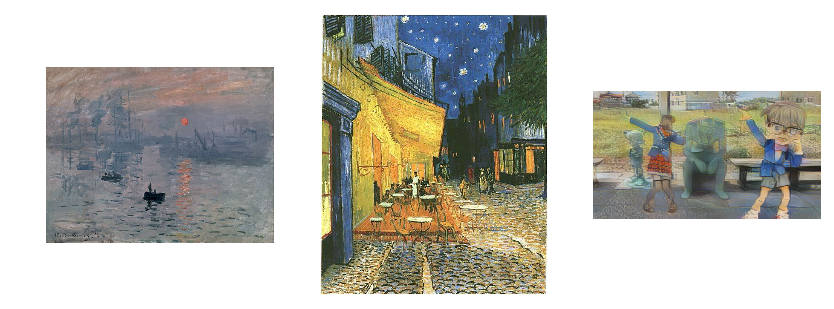

In [ ]:
#显示已完成融合的图片
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.subplot(1,3,1)
plt.imshow(Image.open('work/Sunrise/1.jpg'))
plt.axis('off')
plt.xticks([])
plt.subplot(1,3,2)
plt.imshow(Image.open('work/Cafe/1.jpg'))
plt.axis('off')
plt.xticks([])
plt.subplot(1,3,3)
plt.imshow(Image.open('change_result/ndarray_1756840578.5780277.jpg'))
plt.axis('off')
plt.xticks([])
plt.show()

将视频的44帧以后图片进行融合，最后保存为视频

In [32]:
import cv2
import paddlehub as hub
from tqdm import tqdm
stylepro_artistic = hub.Module(name="stylepro_artistic")
video = cv2.VideoCapture("result.mp4")
fps = video.get(cv2.CAP_PROP_FPS)
frameCount = video.get(cv2.CAP_PROP_FRAME_COUNT)
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("总共的帧数为：",frameCount)
success, frame = video.read() 
file_paths = []
index = 0
for i in tqdm(range(int(frameCount))):
    if success and index >= 44:
            result = stylepro_artistic.style_transfer(
                images=[{
                    'content': frame,
                    'styles': [cv2.imread('work/Sunrise/1.jpg'),cv2.imread('work/Cafe/1.jpg')]
    }],
                #use_gpu=True,
                visualization=True,
                output_dir='transvideo_result')
            file_paths.append(result[0]['save_path'])
    elif success:
        filep = 'transvideo_result/'+str(index)+'.jpg'
        cv2.imwrite(filep, frame)
        file_paths.append(filep)
    success, frame = video.read()
    index += 1

[2025-09-03 12:48:15,304] [    INFO] - Installing stylepro_artistic module
[2025-09-03 12:48:15,326] [    INFO] - Module stylepro_artistic already installed in /home/aistudio/.paddlehub/modules/stylepro_artistic


总共的帧数为： 165.0



100%|██████████| 165/165 [21:49<00:00,  7.94s/it]


将图片合成为视频

In [33]:
import os
import cv2

# 从原视频获取帧率和尺寸参数（用于保持视频属性一致）
video = cv2.VideoCapture("result.mp4")
fps = video.get(cv2.CAP_PROP_FPS)  # 帧率
size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # 视频尺寸
video.release()  # 获取参数后释放视频对象

# 收集transvideo_result文件夹中的图片并按序号排序
file_dict = {}
for filename in os.listdir('transvideo_result/'):
    # 只处理图片文件
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            # 提取文件名中的数字（假设格式为"ndarray_数字.jpg"）
            num = float(filename.replace('ndarray_', '').split('.')[0])
            file_dict[os.path.join('transvideo_result', filename)] = num
        except (ValueError, IndexError):
            # 跳过命名不符合规则的文件
            continue

# 按数字序号排序图片路径
sorted_files = sorted(file_dict.items(), key=lambda x: x[1])

# 如果没有有效图片，提示并退出
if not sorted_files:
    print("transvideo_result文件夹中未找到有效图片")
    exit()

# 创建视频写入对象
videoWriter = cv2.VideoWriter(
    'Victory.avi',
    cv2.VideoWriter_fourcc(*"MJPG"),
    fps,
    size
)

# 按顺序写入所有图片
for file_path, _ in sorted_files:
    img = cv2.imread(file_path)
    if img is not None:
        # 确保图片尺寸与视频尺寸一致（如不一致则调整）
        if img.shape[:2] != (size[1], size[0]):
            img = cv2.resize(img, size)
        videoWriter.write(img)
    else:
        print(f"警告：无法读取图片 {file_path}，已跳过")

# 释放资源
videoWriter.release()
cv2.destroyAllWindows()
print(f"视频合成完成，共写入 {len(sorted_files)} 张图片")

视频合成完成，共写入 165 张图片


In [34]:
# 提取原音频，合成到新的视频上
from moviepy.editor import *
video_o = VideoFileClip("video.mp4")
videoclip = VideoFileClip("Victory.avi")
audio_o = video_o.audio

videoclip2 = videoclip.set_audio(audio_o)

videoclip2.write_videofile("Vic.mp4")

                                               
  4%|▎         | 6/165 [24:01<29:06, 10.98s/it]

Moviepy - Building video Vic.mp4.
MoviePy - Writing audio in VicTEMP_MPY_wvf_snd.mp3



chunk:  97%|█████████▋| 118/122 [00:00<00:00, 579.63it/s, now=None]


MoviePy - Done.
Moviepy - Writing video Vic.mp4



t:  99%|█████████▉| 164/165 [00:08<00:00, 13.46it/s, now=None]


Moviepy - Done !
Moviepy - video ready Vic.mp4


  4%|▎         | 6/165 [24:14<29:06, 10.98s/it]